In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

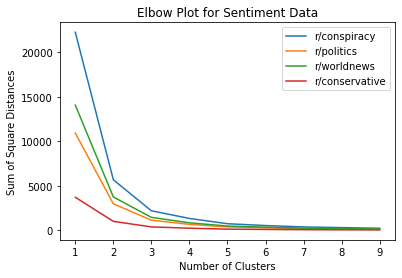

In [2]:
from scripts import visuals

query = "vaccine"
subreddits = ["conspiracy", "politics", "conspiracy", "worldnews", "conservative"]
sentiment = "compound_sentiment"

# Here, we can quickly check how 
visuals.DisplayClusterDistances(query, subreddits, sentiment).main()

/Users/User/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


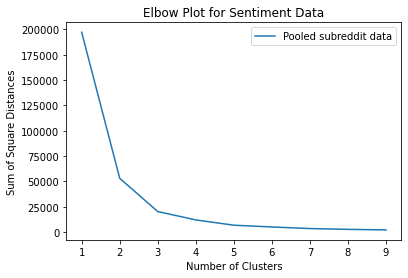

In [3]:
from scripts import clustering_analysis

clustering_dataframe = clustering_analysis.GetClusters("vaccine", "compound_sentiment").main()

cluster
negative    167228
neutral     199941
positive    223540
Name: id, dtype: int64


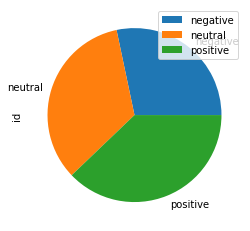

In [10]:
cluster_frequencies = clustering_dataframe.groupby(["cluster"]).count()
cluster_frequencies.plot.pie(y="id")
print(cluster_frequencies["id"])

In [15]:
# Get number of days in DataFrame
num_days = len(clustering_dataframe.groupby("date").count())
# Set cutoff at 10 posts per day
cutoff = int(10*num_days)
# Eliminate subreddits that don't have 10 posts for every day
v = clustering_dataframe.subreddit.value_counts()
subreddit_df = clustering_dataframe[clustering_dataframe.subreddit.isin(v.index[v.gt(cutoff)])]

pos_subreddits = pd.DataFrame(subreddit_df['subreddit'].loc[subreddit_df["cluster"] == "positive"].value_counts())
neg_subreddits = pd.DataFrame(subreddit_df['subreddit'].loc[subreddit_df["cluster"] == "negative"].value_counts())
subreddits = pd.DataFrame(subreddit_df['subreddit'].value_counts())

pos_subreddits = pd.DataFrame(pos_subreddits/subreddits).sort_values(by="subreddit", ascending=False)
neg_subreddits = pd.DataFrame(neg_subreddits/subreddits).sort_values(by="subreddit", ascending=False)

print(pos_subreddits)

print(neg_subreddits)
    

                     subreddit
COVID19               0.502923
askscience            0.482799
wallstreetbets        0.461899
Coronavirus           0.408900
singapore             0.405398
relationship_advice   0.394340
worldnews             0.390081
canada                0.383534
news                  0.375396
science               0.375197
pics                  0.374763
politics              0.372002
changemyview          0.369149
europe                0.354372
australia             0.351709
AskReddit             0.346187
conservative          0.343875
conspiracy            0.313737
                     subreddit
changemyview          0.376509
conspiracy            0.364258
relationship_advice   0.341300
conservative          0.318141
australia             0.313782
AskReddit             0.305068
europe                0.301508
science               0.285771
news                  0.284023
politics              0.278666
worldnews             0.273602
singapore             0.263631
canada  